# Assign by TMDS 

TMDS (Total mass difference statistics) is method for assign mass signal by brutto formulas. Signals are taken as a basis for which we can reliably determine and confirm the elemental composition, for example, those that have the corresponding peak of the C13 isotope. Then all the mass differences between all reliable signals are found and those that occur most often are selected. Then, the found mass differences are added to the masses of reliable signals and the peaks in the obtained region are searched for; if they match, they are assigned the elemental mass of the base peak + mass difference.

Read more here: Kunenkov, Erast V., et al. "Total mass difference statistics algorithm: a new approach to identification of high-mass building blocks in electrospray ionization Fourier transform ion cyclotron mass spectrometry data of natural organic matter." Analytical chemistry 81.24 (2009): 10106-10115.

In [1]:
from natorgms.spectrum import Spectrum
from natorgms.diff import Tmds, assign_by_tmds
import natorgms.draw as draw

Assign with minimal error - 0.25 for more reliable results

Show initial vk

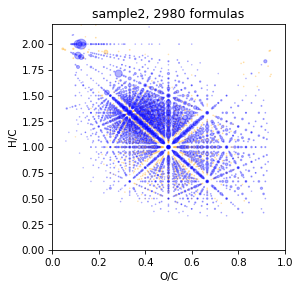

In [2]:
spec = Spectrum.read_csv('data/sample2.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
spec = spec.assign(brutto_dict={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,2)}, rel_error=0.25)
draw.vk(spec)

## Caclculate TMDS

This may take quite a long time

In [3]:
tmds_spec = Tmds(spec=spec).calc(p=0.2) #by varifiy p-value we can choose how much mass-diff we will take
tmds_spec = tmds_spec.assign(brutto_dict={'C':(-1,20),'H':(-4,40), 'O':(-1,20),'N':(0,1)})
tmds_spec = tmds_spec.calc_mass()
tmds_spec.table

,mass,intensity,C,H,O,N,assign,calc_mass
0,0.036,1.264341,1.0,4.0,-1.0,0.0,True,0.036385
1,2.016,2.827907,0.0,2.0,0.0,0.0,True,2.015650
2,3.995,2.691473,-1.0,0.0,1.0,0.0,True,3.994915
3,4.068,1.674419,1.0,8.0,-1.0,0.0,True,4.067685
4,6.011,2.021705,-1.0,2.0,1.0,0.0,True,6.010565
...,...,...,...,...,...,...,...,...
322,282.074,0.504651,13.0,14.0,7.0,0.0,True,282.073955
323,284.053,0.330233,12.0,12.0,8.0,0.0,True,284.053220
324,286.105,0.467442,13.0,18.0,7.0,0.0,True,286.105255
325,294.074,0.395349,14.0,14.0,7.0,0.0,True,294.073955


We can plot total mass diference spectrum

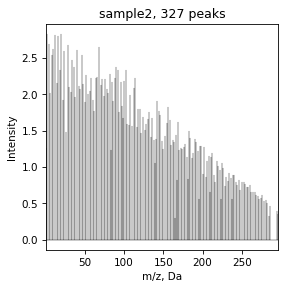

In [4]:
draw.spectrum(tmds_spec)

## Assigne by TMDS

It is takes a lot of times

In [5]:
spec = assign_by_tmds(spec, tmds_spec, rel_error=3)
#show percent of process complete

100%|██████████| 327/327 [02:02<00:00,  2.67it/s]


Look result

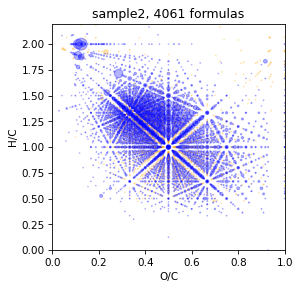

In [6]:
draw.vk(spec)

Look how it will be Without TMDS and rel_error 0.5 ppm

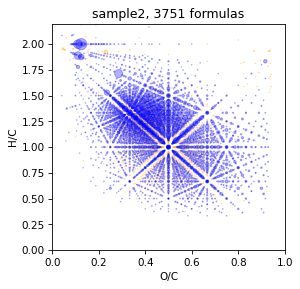

In [7]:
spec = Spectrum.read_csv('data/sample2.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
spec = spec.assign(brutto_dict={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,3)}, rel_error=0.5)
draw.vk(spec)

## TMDS setting

take 100 diff-masses from tmds

If you want to acselerate treatment or restrict tmds by number you can restrict it. But for best result it is better to use 400-500 mass-diffrences from tmds.

100%|██████████| 101/101 [00:40<00:00,  2.51it/s]


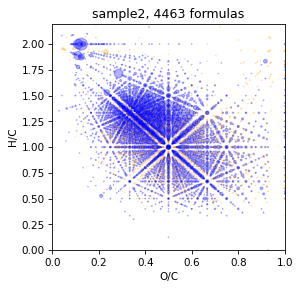

In [8]:
spec = Spectrum.read_csv('data/sample2.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
spec = spec.assign(brutto_dict={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,3)}, rel_error=0.25)

spec = assign_by_tmds(spec, max_num=100)

draw.vk(spec)

take tmds with p-value = 0.7

Some times with default p-value = 0.2 tmds spectrum will be too big, so its reasonobly restrict it by p-value.

100%|██████████| 149/149 [00:58<00:00,  2.54it/s]


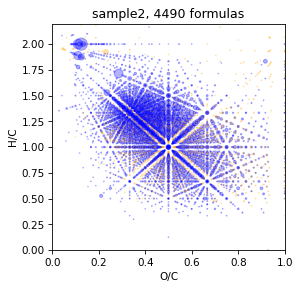

In [9]:
spec = Spectrum.read_csv('data/sample2.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
spec = spec.assign(brutto_dict={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,3)}, rel_error=0.25)

spec = assign_by_tmds(spec, p=0.7)

draw.vk(spec)

take tmds with p-value = 1.0 but without verification by C13_peaks

Actually it is better use C13 validation, but when spectrum consist only 500-1000 reliable ions, it may be good desicion because tmds may be toot small.

100%|██████████| 37/37 [00:15<00:00,  2.39it/s]


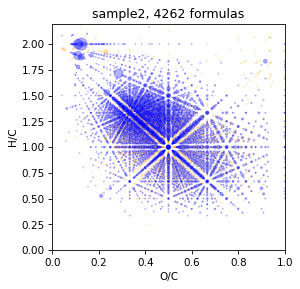

In [10]:
spec = Spectrum.read_csv('data/sample2.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
spec = spec.assign(brutto_dict={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,3)}, rel_error=0.25)

spec = assign_by_tmds(spec, p=1.0, C13_filter=False)

draw.vk(spec)